In [11]:
!pip install pymle-diffusion

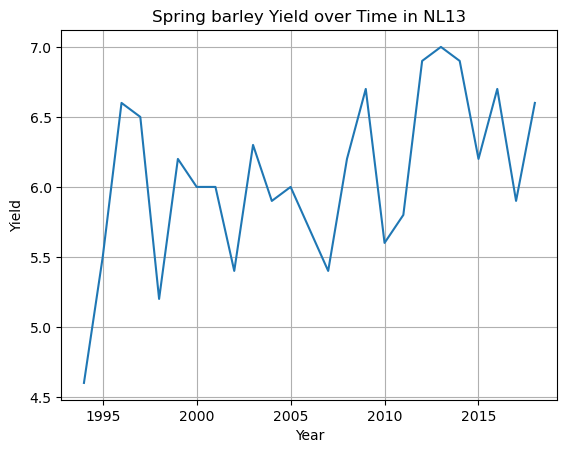

Initial Params: [0.24 1.   0.1 ]
Initial Likelihood: -990.0463773197765
`gtol` termination condition is satisfied.
Number of iterations: 24, function evaluations: 80, CG iterations: 37, optimality: 6.09e-07, constraint violation: 0.00e+00, execution time: 0.026 s.
Final Params: [0.01038411 1.99546569 0.89997696]
Final Likelihood: -31.92930628425676

Exact MLE: 
params      | [0.01038411 1.99546569 0.89997696] 
sample size | 24 
likelihood  | -31.92930628425676 
AIC         | 69.85861256851352
BIC         | 73.39277405955735
Initial Params: [0.24 1.   0.1 ]
Initial Likelihood: -985.7309052354276
`xtol` termination condition is satisfied.
Number of iterations: 35, function evaluations: 100, CG iterations: 61, optimality: 6.76e-02, constraint violation: 0.00e+00, execution time: 0.025 s.
Final Params: [0.11591051 1.12838874 0.78425756]
Final Likelihood: -37.96400931700015

Kessler MLE: 
params      | [0.11591051 1.12838874 0.78425756] 
sample size | 24 
likelihood  | -37.96400931700015 
A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymle.models.CIR import CIR
from pymle.core.TransitionDensity import ExactDensity, KesslerDensity, ShojiOzakiDensity, OzakiDensity
from pymle.fit.AnalyticalMLE import AnalyticalMLE

# Step 1: Load the dataset
file_path = '../datasets/CropSDEData/YIELD_NUTS2_NL_transposed.csv'
data = pd.read_csv(file_path)

# Step 2: Filter the dataset for a specific crop and region (e.g., "Spring barley" and "NL13")
crop_name = 'Spring barley'
region_code = 'NL13'
filtered_data = data[(data['CROP'] == crop_name) & (data['IDREGION'] == region_code)]

# Extract years and yield data
years = filtered_data['year'].values
yield_data = filtered_data['yield'].values

# Step 3: Normalize the time step and sample the data
skip = 1  # You can adjust this if necessary
dt = skip / (max(years) - min(years))  # Time interval normalized over the years
sample = yield_data[::skip]  # Sampled yield data

# Step 4: Define initial guess and parameter bounds for the CIR model
guess = np.asarray([.24, 1.0, 0.1])  # Initial guess for CIR parameters (kappa, theta, sigma)
param_bounds = [(0.01, 5), (0.01, 2), (0.01, 0.9)]  # Parameter bounds

# Step 5: Create the CIR model
model = CIR()

# Plot the original yield data for reference
plt.plot(years, yield_data, label=f'{crop_name} Yield Data ({region_code})')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title(f'{crop_name} Yield over Time in {region_code}')
plt.grid(True)
plt.show()

# Step 6: Fit the model using different Maximum Likelihood Estimators (MLE)

# Fit using Exact MLE
exact_est = AnalyticalMLE(sample=sample, param_bounds=param_bounds, dt=dt, density=ExactDensity(model)).estimate_params(guess)
print(f'\nExact MLE: {exact_est}')

# Fit using Kessler MLE
kessler_est = AnalyticalMLE(sample=sample, param_bounds=param_bounds, dt=dt, density=KesslerDensity(model)).estimate_params(guess)
print(f'\nKessler MLE: {kessler_est}')

# Fit using Shoji-Ozaki MLE
shojioz_est = AnalyticalMLE(sample=sample, param_bounds=param_bounds, dt=dt, density=ShojiOzakiDensity(model)).estimate_params(guess)
print(f'\nShoji-Ozaki MLE: {shojioz_est}')

# Fit using Ozaki MLE
ozaki_est = AnalyticalMLE(sample=sample, param_bounds=param_bounds, dt=dt, density=OzakiDensity(model)).estimate_params(guess)
print(f'\nOzaki MLE: {ozaki_est}')


Based on AIC and BIC, the Exact MLE and Ozaki MLE are the best-fitting models for your data because they have the lowest values, indicating a good balance between model fit and complexity.
The Kessler MLE and Shoji-Ozaki MLE have higher AIC and BIC values, meaning they are less suitable for this dataset compared to Exact and Ozaki MLEs.


- Log-likelihood: Your log-likelihood values (e.g., -35 and -26) are significantly smaller than in the example (e.g., 4398). Smaller log-likelihoods lead to positive AIC/BIC values.
- Sample size: The example uses a larger dataset (1250 observations), which contributes to higher log-likelihood values and possibly negative AIC/BIC.
- Scale of data: Crop yields likely exhibit smaller variations than the example's interest rate data, leading to smaller log-likelihoods.